# Autograd를 통한 이미지 복구

In [ ]:
import torch
import pickle
import matplotlib.pyplot as plot

## 데이터 불러오기

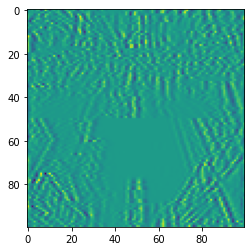

In [30]:
fileName = "broken_image_t.p"
# fileName2 = "broken_img.jpg"

broken_image = torch.FloatTensor(pickle.load(open(fileName, "rb"), encoding="latin1"))

plot.imshow(broken_image.view(100, 100))

## 이미지를 구리게 만든 주범

In [32]:
# 이 함수를 통해 위 사진처럼 이미지가 이상하게 변했다. 알고리즘을 알고 있을 경우 어떻게 복원시킬까?
def weird_function(x, n_iter=5):
    h = x    
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h


## 복원해보자

0회차 : 오차 : 12.105914115905762
1000회차 : 오차 : 1.1180827617645264
2000회차 : 오차 : 0.5370901226997375
3000회차 : 오차 : 0.37184643745422363
4000회차 : 오차 : 0.29409152269363403
5000회차 : 오차 : 0.24619780480861664
6000회차 : 오차 : 0.21165809035301208
7000회차 : 오차 : 0.184193417429924
8000회차 : 오차 : 0.1608887016773224
9000회차 : 오차 : 0.14023183286190033
10000회차 : 오차 : 0.1213669404387474
11000회차 : 오차 : 0.10376909375190735
12000회차 : 오차 : 0.08709710836410522
13000회차 : 오차 : 0.07112125307321548
14000회차 : 오차 : 0.05568385496735573
15000회차 : 오차 : 0.040677305310964584
16000회차 : 오차 : 0.026030367240309715
17000회차 : 오차 : 0.021158257499337196
18000회차 : 오차 : 0.021165715530514717
19000회차 : 오차 : 0.021167421713471413


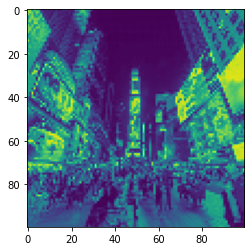

In [36]:
def distance_loss(hypothesis, broken_image): # hypothesis는 랜덤이미지를 weird_function을 돌려서 나온 결과
    return torch.dist(hypothesis, broken_image)


# 랜덤 텐서 생성(랜덤 이미지)
random_tensor = torch.randn(10000, dtype=torch.float)


# 경사하강법에 사용될 준비물(학습률)
lr = 0.8

# 경사하강법 구현

for i in range(0, 20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    
    with torch.no_grad():
        random_tensor = random_tensor - lr * random_tensor.grad
        
    if i % 1000 == 0:
        print("{}회차 : 오차 : {}".format(i, loss.item()))
        
plot.imshow(random_tensor.view(100, 100).data)